<a href="https://colab.research.google.com/github/avantika10roy/Heart-Disease-Prediction-Model/blob/main/Heart_Disease_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#upload dataset and display size of rows and columns
heart = pd.read_csv('/content/heart.csv')
print(heart.shape)

(303, 14)


In [27]:
#Check for missing values
missing_values = heart.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [28]:
#Basic statistics
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [29]:
print(heart.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

<Axes: title={'center': 'Correlation Heatmap'}>

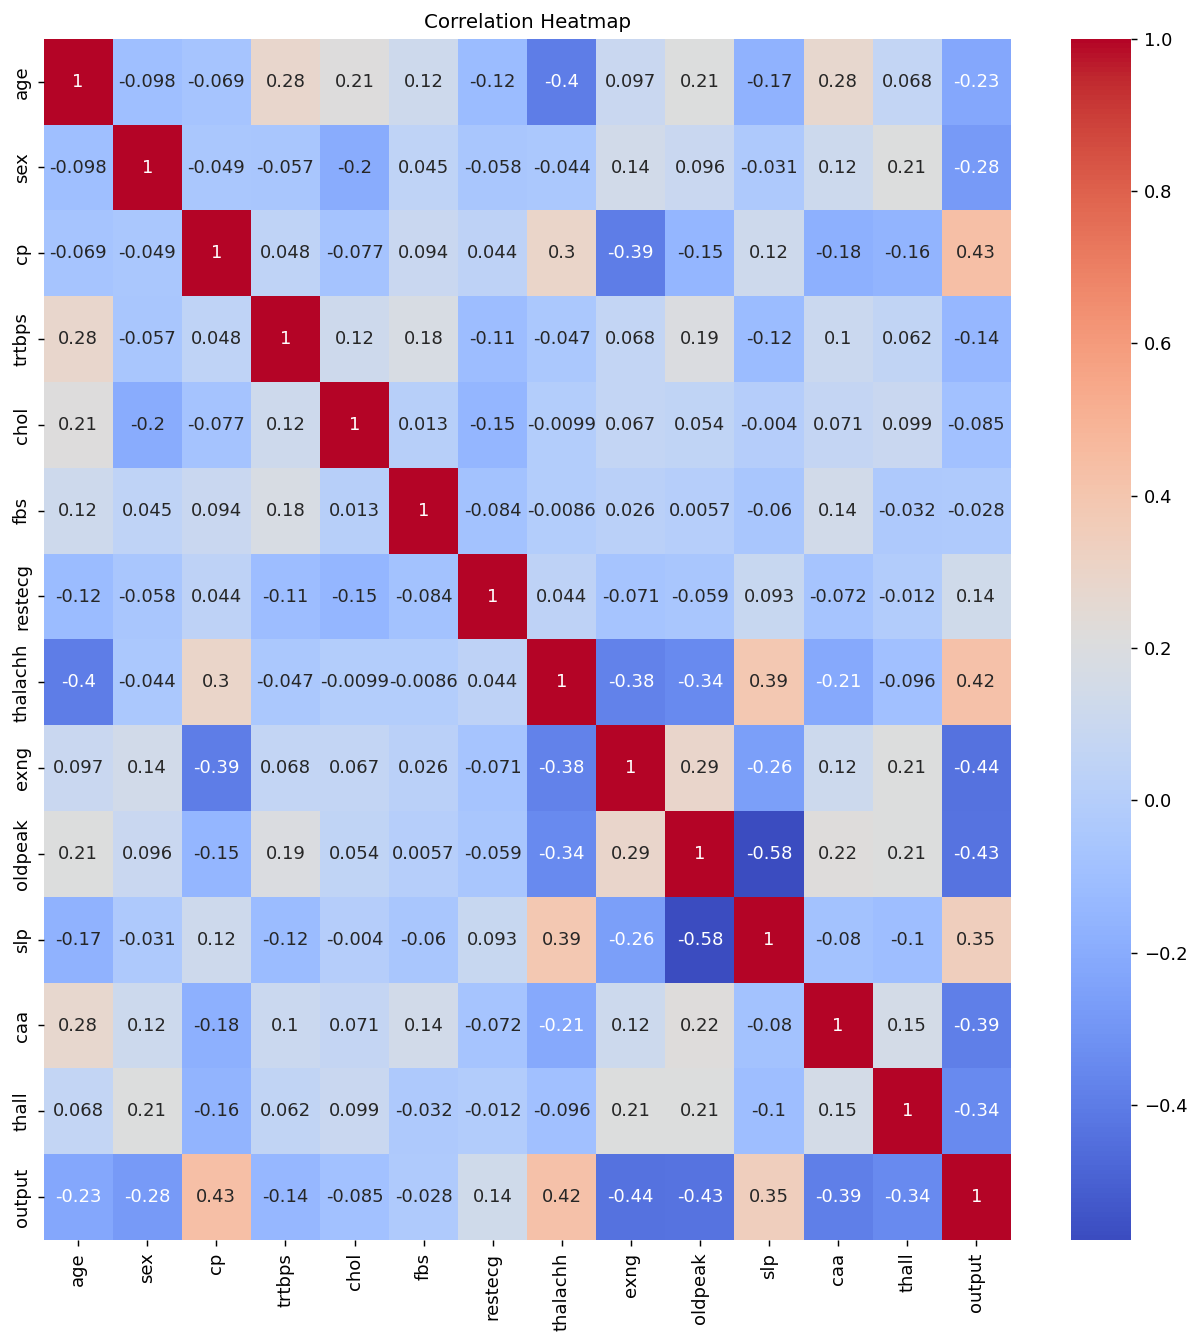

In [31]:
#Heatmap Visualization
plt.figure(figsize=[12,12], dpi=130)
plt.title('Correlation Heatmap', fontsize=11)
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')

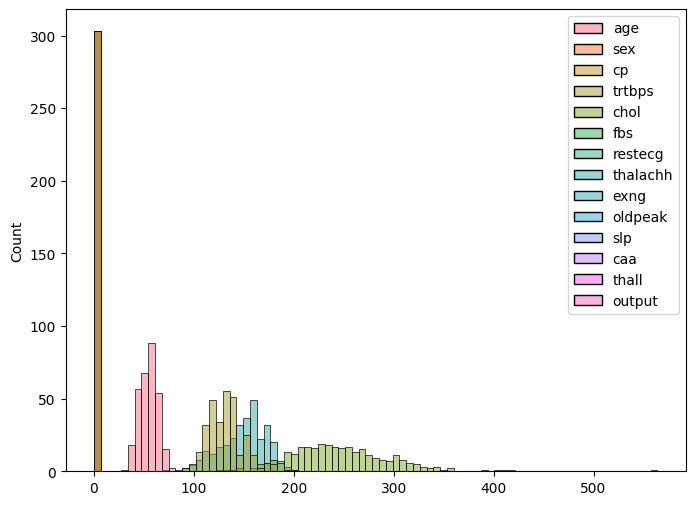

In [32]:
#Histplot Visualization
plt.figure(figsize=(8, 6))
sns.histplot(data=heart)
plt.show()

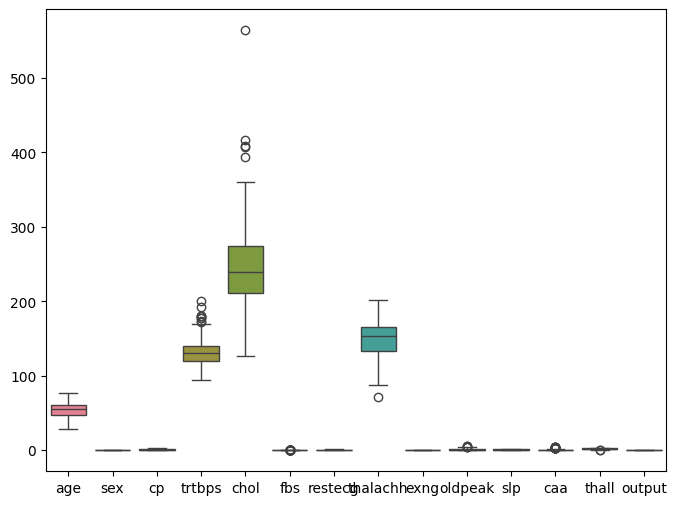

In [33]:
#Boxplot Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart)
plt.show()

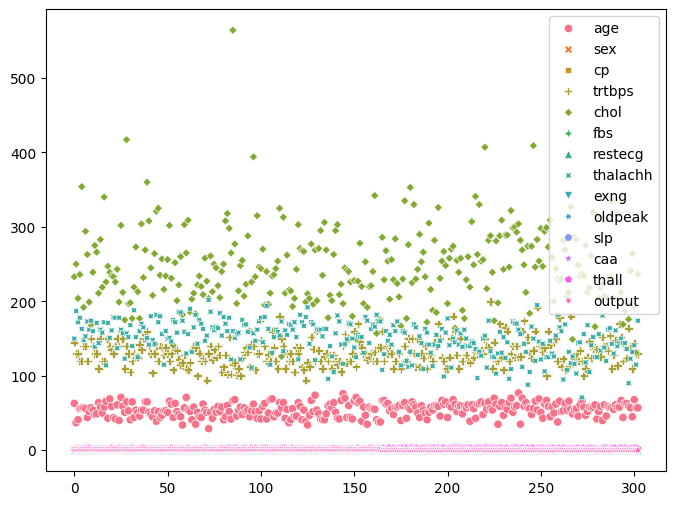

In [34]:
#Scatterplot Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=heart)
plt.show()

<Figure size 800x600 with 0 Axes>

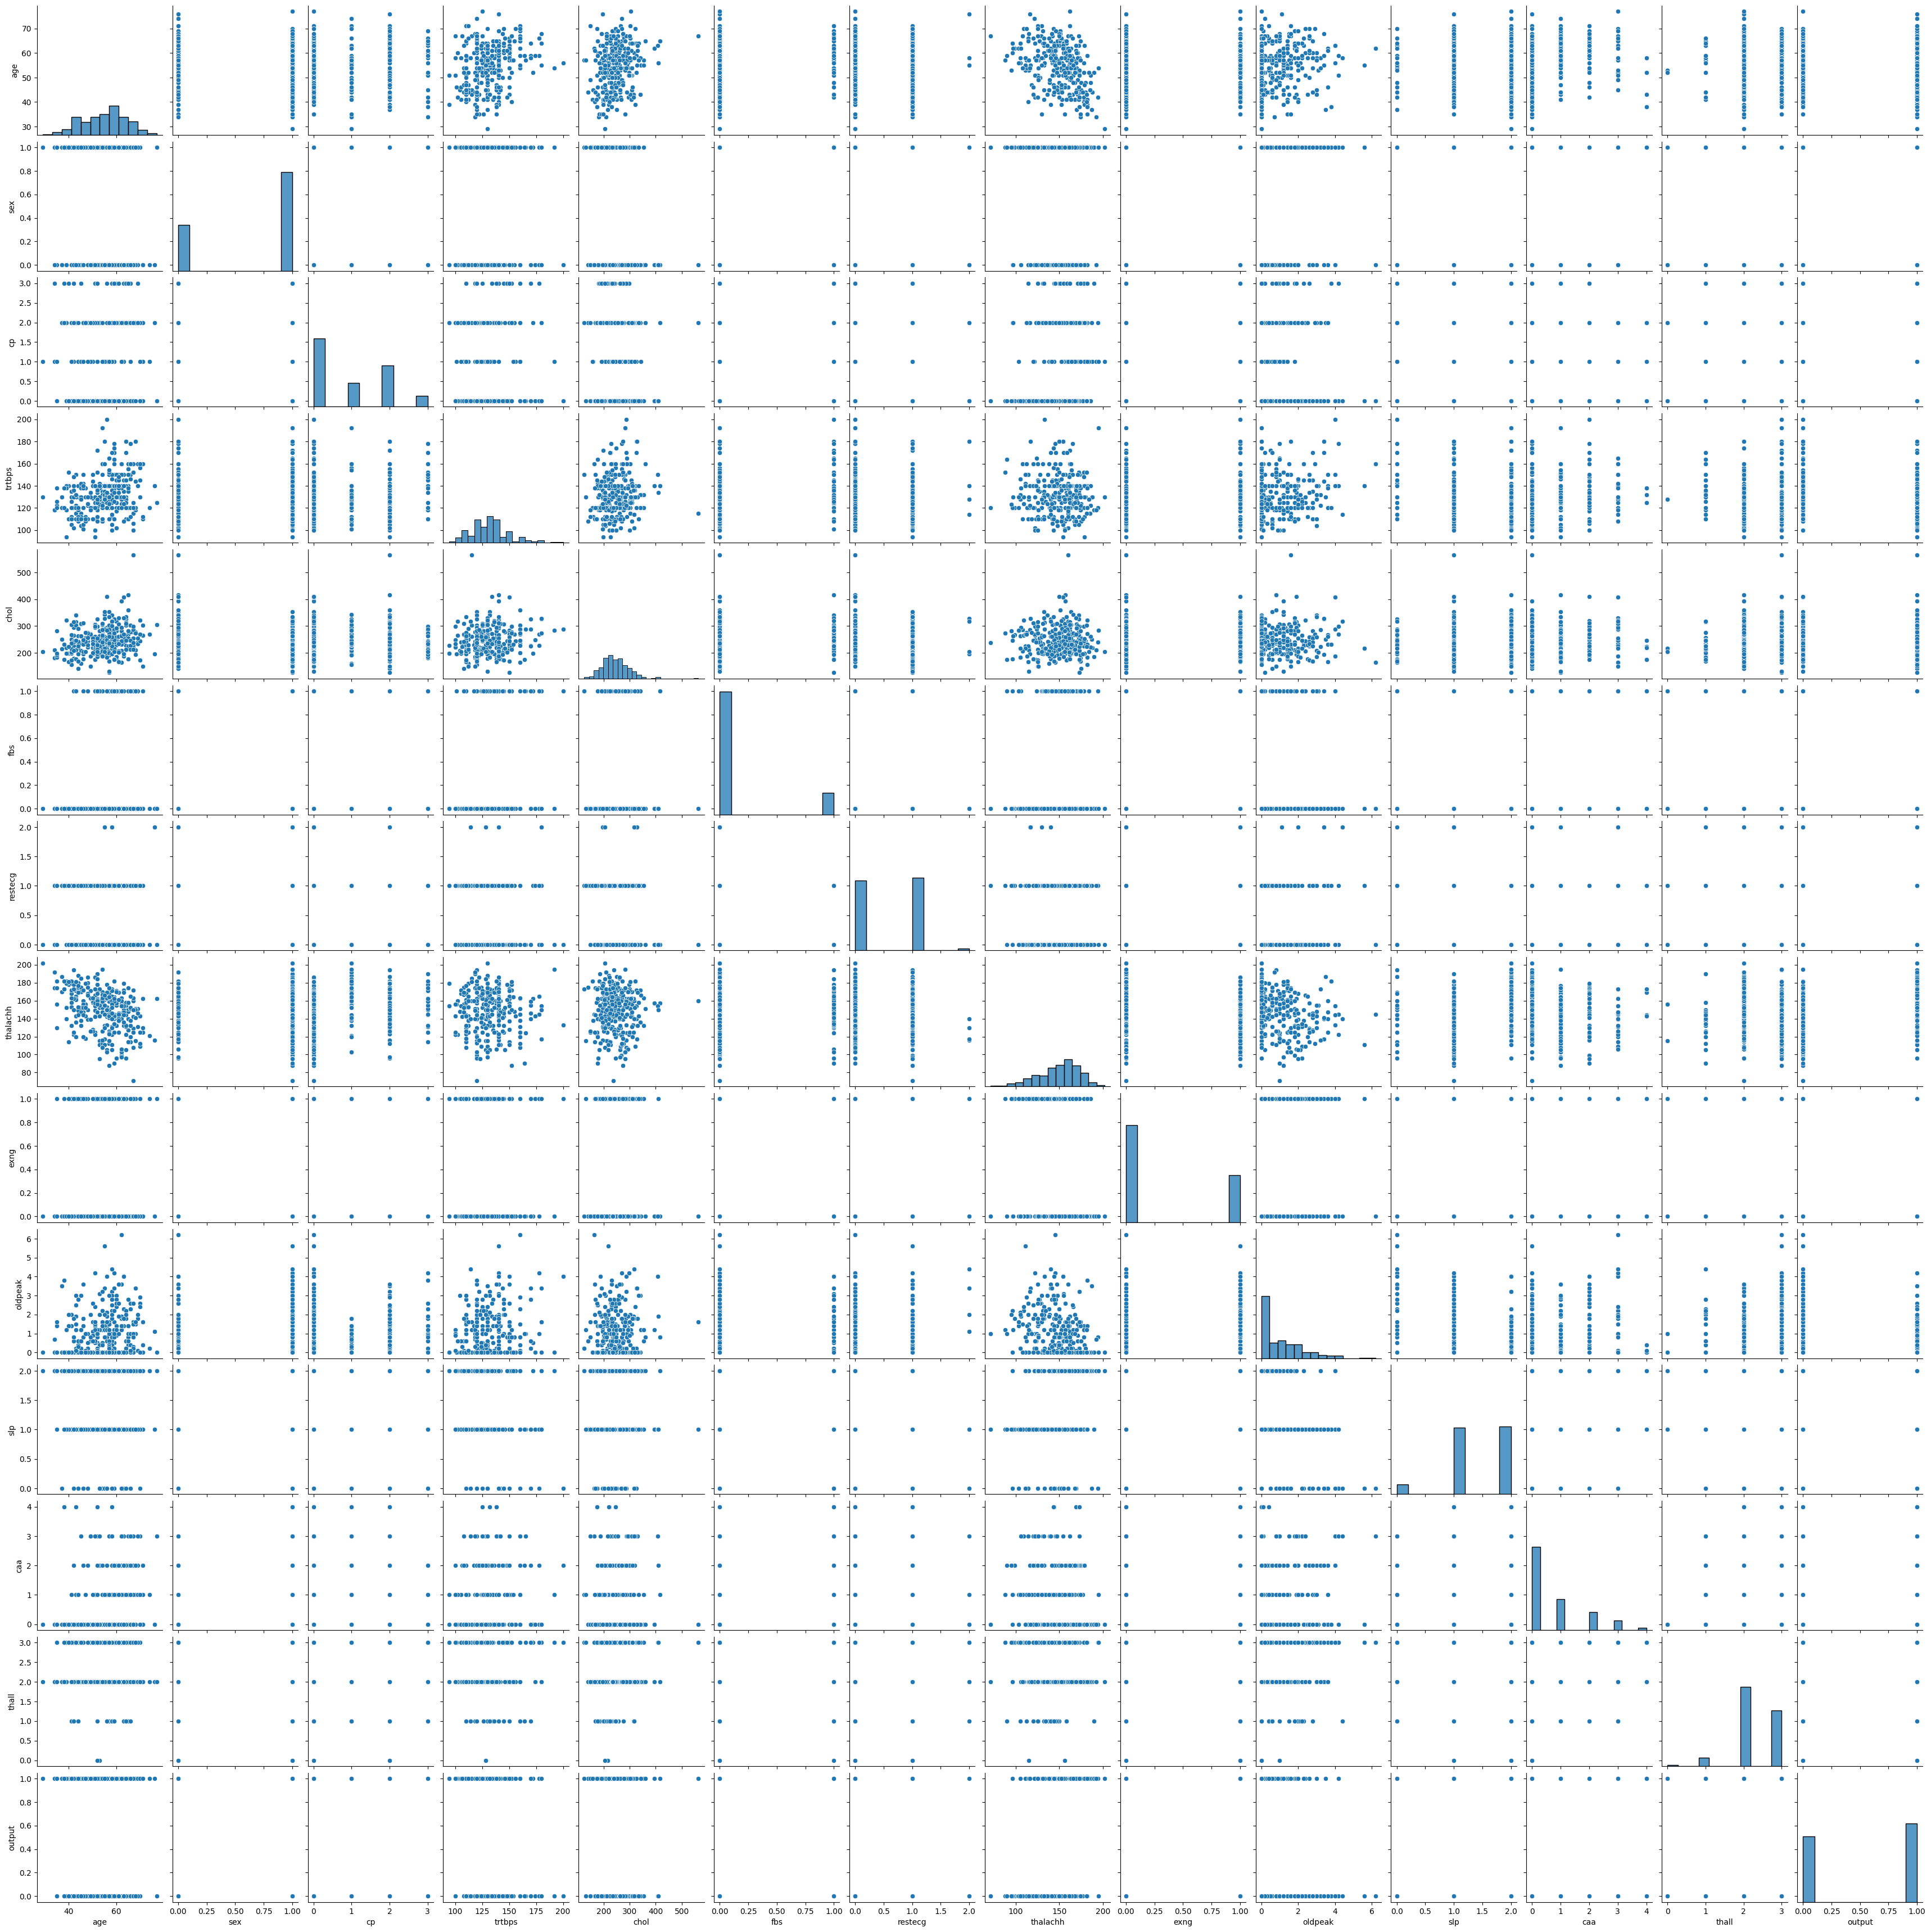

In [36]:
#Pairplot Visualiztion
plt.figure(figsize=(8, 6))
sns.pairplot(data=heart)
plt.show()

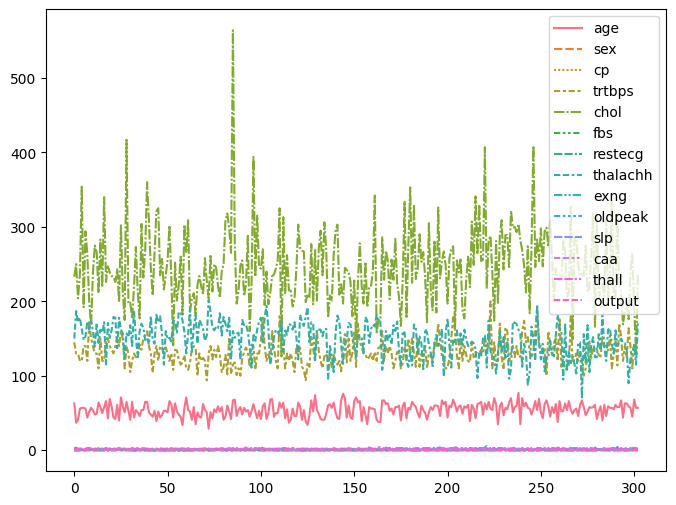

In [37]:
#Lineplot Visualization
plt.figure(figsize=(8, 6))
sns.lineplot(data=heart)
plt.show()

In [44]:
#import libraries for training
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [39]:
columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = heart[columns]
Y = heart['output']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
#Logistic Regression
model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model1.fit(x_train, y_train)
test_score = model1.score(x_test, y_test)
print('Logistic Regression Test Score:', test_score)

cv_scores = cross_val_score(model1, X, Y, cv=5)
print('Logistic Regression Cross Validation Score:', cv_scores)
print('Logistic Regression Mean Cross Validation Score:', cv_scores.mean())
y_pred_logreg = model1.predict(x_test)

Logistic Regression Test Score: 0.8852459016393442
Logistic Regression Cross Validation Score: [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Logistic Regression Mean Cross Validation Score: 0.8282513661202187


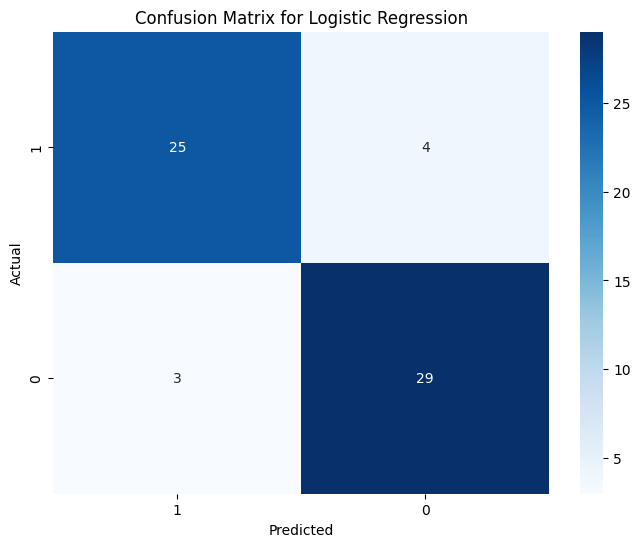

In [42]:
#Confusion Matrix for Logistic Regression
import matplotlib.pyplot as plt
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, cmap="Blues", fmt="d", xticklabels=heart['output'].value_counts().index, yticklabels=heart['output'].value_counts().index)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [45]:
#Classification Report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61

Confusion Matrix
[[15 14]
 [ 4 28]]


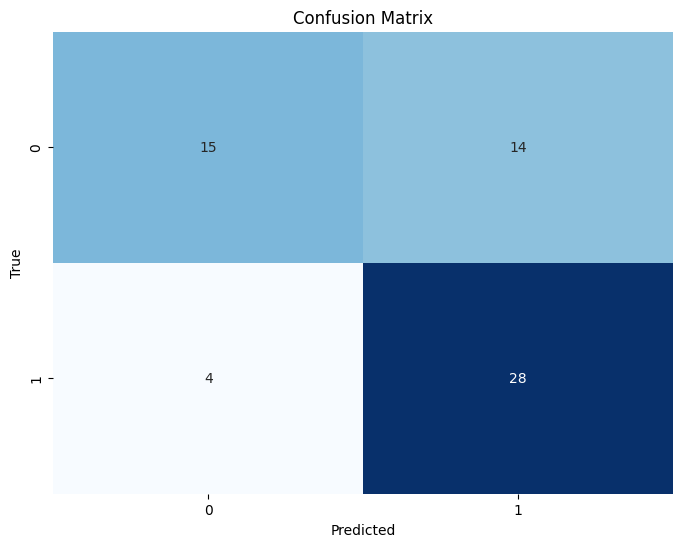

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_classifier = SVC(kernel='rbf', gamma='scale')
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)
print("SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))
cm= confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix')
print(cm)
plt.figure(figsize=(8,6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy of KNN: 0.6557377049180327
Confusion Matrix of KNN:
[[20  9]
 [12 20]]


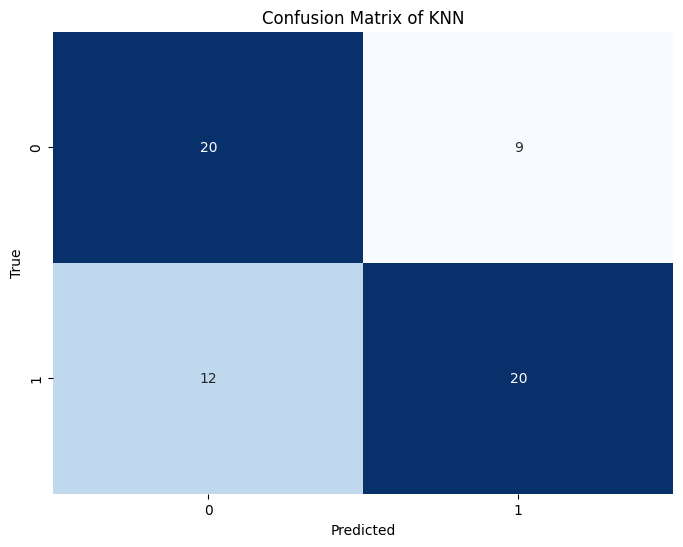

In [47]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix of KNN:")
print(cm_knn)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of KNN")
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix
[[24  5]
 [ 5 27]]


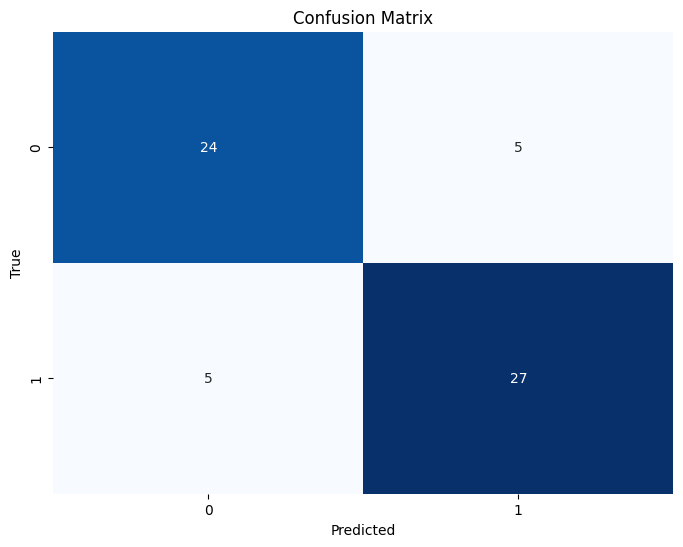

In [48]:
from sklearn.ensemble import RandomForestClassifier
rdmfrst = RandomForestClassifier(n_estimators=100, random_state=42)
rdmfrst.fit(x_train, y_train)
y_pred_frst = rdmfrst.predict(x_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_frst))
cm= confusion_matrix(y_test, y_pred_frst)
print('Confusion Matrix')
print(cm)
plt.figure(figsize=(8,6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        29
           1       0.86      0.56      0.68        32

    accuracy                           0.72        61
   macro avg       0.75      0.73      0.72        61
weighted avg       0.76      0.72      0.71        61

Accuracy of Ensemble: 0.7213114754098361
Confusion Matrix of Ensemble:
[[26  3]
 [14 18]]


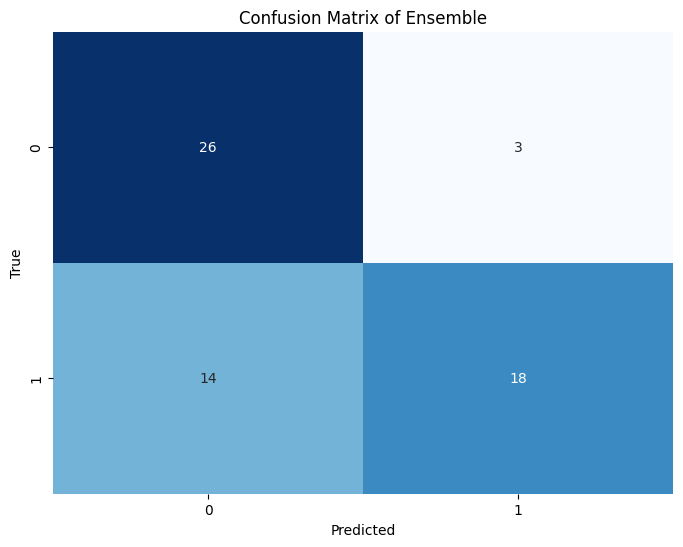

Classification Report of Ensemble:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        29
           1       0.86      0.56      0.68        32

    accuracy                           0.72        61
   macro avg       0.75      0.73      0.72        61
weighted avg       0.76      0.72      0.71        61



In [49]:
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier

estimators = [('knn', knn), ('rdmfrst', rdmfrst)]
ensemble = VotingClassifier(estimators)
ensemble.fit(x_train, y_train)
y_pred_ensemble = ensemble.predict(x_test)
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Accuracy of Ensemble:", accuracy_ensemble)

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Confusion Matrix of Ensemble:")
print(cm_ensemble)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Ensemble")
plt.show()

print("Classification Report of Ensemble:")
print(classification_report(y_test, y_pred_ensemble))


Logistic Regression accuracy: 0.8852459016393442
SVM accuracy: 0.7049180327868853
K-Nearest Neighbour accuracy: 0.6557377049180327
Random Forest accuracy: 0.8360655737704918
Ensemble accuracy: 0.7213114754098361


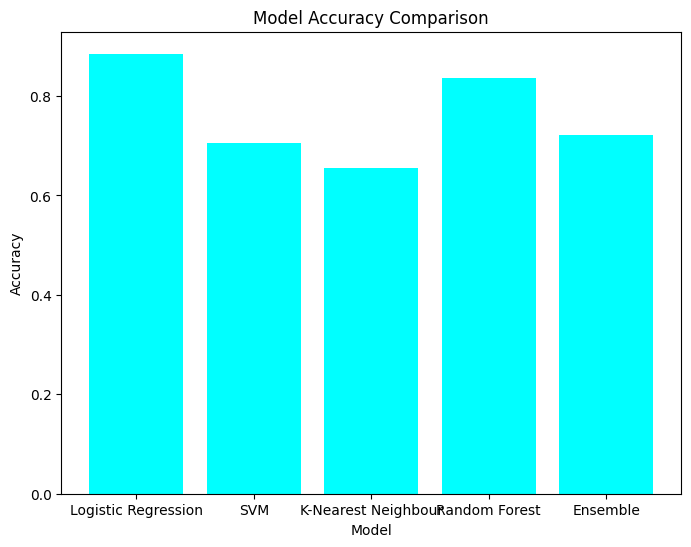

In [50]:
models = [model1, svm_classifier, knn, rdmfrst, ensemble]
names = ['Logistic Regression', 'SVM', 'K-Nearest Neighbour', 'Random Forest', 'Ensemble']
for model, name in zip(models, names):
    score = model.score(x_test, y_test)
    print(f"{name} accuracy: {score}")

model_names = ['Logistic Regression', 'SVM', 'K-Nearest Neighbour', 'Random Forest', 'Ensemble']
accuracy_scores = [model1.score(x_test, y_test), svm_classifier.score(x_test, y_test),
                   knn.score(x_test, y_test), rdmfrst.score(x_test, y_test), ensemble.score(x_test, y_test)]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color='cyan')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


In [55]:
def gender_to_binary(gender):
    if gender.lower() == 'male':
        return 1
    elif gender.lower() == 'female':
        return 0
    else:
        raise ValueError("Invalid gender input. Please provide 'male' or 'female'.")

def blood_sugar_to_binary(blood_sugar_level):
    if blood_sugar_level.lower() == 'normal':
        return 0
    elif blood_sugar_level.lower() == 'abnormal':
        return 1
    else:
        raise ValueError("Invalid blood sugar level input. Please provide 'normal' or 'abnormal'.")

def angina_to_binary(angina_presence):
    if angina_presence.lower() == 'yes':
        return 1
    elif angina_presence.lower() == 'no':
        return 0
    else:
        raise ValueError("Invalid angina presence input. Please provide 'yes' or 'no'.")

def get_input():
    while True:
        try:
            Patient_age = int(input("Enter age of the patient: "))
            Patient_sex = input("Enter sex of the patient (male/female): ")
            Patient_sex_binary = gender_to_binary(Patient_sex)
            Chest_pain = int(input("Enter chest pain type (0-3): "))
            Blood_pressure = float(input("Enter resting blood pressure (94-200): "))
            Cholestoral = float(input("Enter serum cholestoral (126-564): "))
            Blood_sugar = input("Enter fasting blood sugar (normal/abnormal): ")
            Blood_sugar_binary = blood_sugar_to_binary(Blood_sugar)
            ECG_result = int(input("Enter resting electrocardiographic results (0-2): "))
            Max_heartRate = int(input("Enter maximum heart rate achieved (71-202): "))
            Angina = input("Enter exercise induced angina (yes/no): ")
            Angina_binary = angina_to_binary(Angina)
            ST_depression = float(input("Enter ST depression induced by exercise relative to rest (0-7): "))
            ST_slope= int(input("Enter ST depression Slope(0-2): "))
            corArt_calcium= int(input("Enter Coronary Artery Calcium score(0-4): "))
            Thalassemia= int(input("Enter severity of Thalassemia(0-3): "))
            break
        except ValueError:
            print("Invalid input. Please enter a valid value.")

    return np.array([[Patient_age, Patient_sex_binary, Chest_pain, Blood_pressure,
                      Cholestoral, Blood_sugar_binary, ECG_result, Max_heartRate,
                      Angina_binary, ST_depression, ST_slope, corArt_calcium, Thalassemia]])

input_data = get_input()
prediction = model1.predict(input_data)
if prediction[0] == 0:
    result = "Patient does not have heart disease."
else:
    result = "Patient has heart disease."
print("Prediction Result:", result)


Enter age of the patient: 70
Enter sex of the patient (male/female): male
Enter chest pain type (0-3): 3
Enter resting blood pressure (94-200): 130
Enter serum cholestoral (126-564): 322
Enter fasting blood sugar (normal/abnormal): normal
Enter resting electrocardiographic results (0-2): 2
Enter maximum heart rate achieved (71-202): 160
Enter exercise induced angina (yes/no): yes
Enter ST depression induced by exercise relative to rest (0-7): 1.6
Enter ST depression Slope(0-2): 2
Enter Coronary Artery Calcium score(0-4): 0
Enter severity of Thalassemia(0-3): 3
Prediction Result: Patient has heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
